# Implementing a Random Forest Classifier

Name: John Hodge

Date: 05/31/2024

## Introduction to Random Forest Classification

In this tutorial, we will learn how to build a random forest classifier from scratch using Python. Random forests are a powerful ensemble learning method that combines multiple decision trees to improve predictive accuracy and robustness. They are widely used in various machine learning tasks, such as classification, regression, and anomaly detection.

Before diving into the code, let's understand the key concepts behind random forests.

**Decision Trees**

A decision tree is a tree-like model that makes decisions based on a series of rules or conditions. Each internal node in the tree represents a feature, and each branch represents a decision rule based on the value of that feature. The leaf nodes represent the final predictions or class labels.

**Ensemble Learning**

Ensemble learning is a technique that combines multiple models to improve the overall performance. The idea is to train multiple models on different subsets of the data or with different algorithms, and then combine their predictions to make a final decision. This approach helps to reduce the variance and overfitting issues that can occur with a single model.

**Random Forests**

Random forests are an ensemble learning method that combines multiple decision trees. The key steps in building a random forest are:

1. **Bootstrap Sampling**: For each decision tree, a random subset of the training data is selected with replacement (known as bootstrapping).
2. **Feature Subsampling**: At each node in a decision tree, a random subset of features is considered for splitting the data.
3. **Decision Tree Training**: A decision tree is trained on the bootstrapped sample, using the randomly selected features for splitting.
4. **Prediction**: To make a prediction for a new data point, each decision tree in the ensemble makes a prediction, and the final prediction is obtained by majority voting (for classification) or averaging (for regression).

By combining multiple decision trees trained on different subsets of the data and features, random forests can capture a diverse set of patterns and reduce the risk of overfitting.

## Random Forest algorithm intuition

Random forest algorithm intuition can be divided into two stages.

In the first stage, we randomly select “k” features out of total m features and build the random forest. In the first stage, we proceed as follows:

    1. Randomly select k features from a total of m features where k < m.
    2. Among the k features, calculate the node d using the best split point.
    3. Split the node into daughter nodes using the best split.
    4. Repeat 1 to 3 steps until l number of nodes has been reached.
    5. Build forest by repeating steps 1 to 4 for n number of times to create n number of trees.

In the second stage, we make predictions using the trained random forest algorithm.

    1. We take the test features and use the rules of each randomly created decision tree to predict the outcome and stores the predicted outcome.
    2. Then, we calculate the votes for each predicted target.
    3. Finally, we consider the high voted predicted target as the final prediction from the random forest algorithm.

Source: [Kaggle Random Forest Classifier Tutorial](https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial)


#### Random Forest algorithm intuition

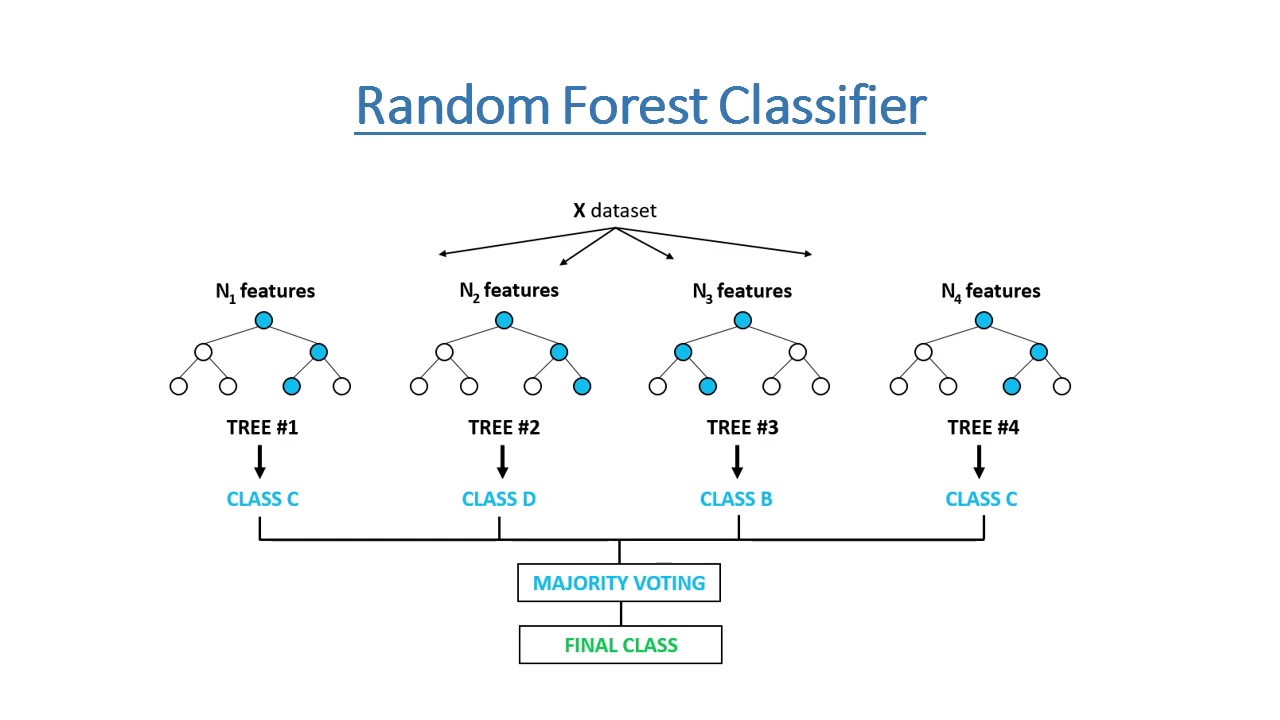

## Pseudocode describing the Random Forest Classifier algorithm

### Random Forest Classifier Algorithm:

Input: Training data X, Training labels y, Number of trees n_trees, Maximum depth max_depth, Minimum node size min_size

Output: Random Forest Classifier model

Procedure:

1. Initialize an empty list to store the individual decision trees: trees = []

2. For i = 1 to n_trees:
    a. Create a bootstrapped sample X_sample, y_sample by randomly sampling from X and y with replacement.
    b. Create a new Decision Tree model with max_depth and min_size parameters.
    c. Train the Decision Tree model on X_sample and y_sample.
    d. Add the trained Decision Tree to the trees list.

3. To make predictions on a new data point x:
    a. Initialize an empty list to store predictions from individual trees: predictions = []
    b. For each tree in trees:
        i. Get the prediction from the tree for the data point x.
        ii. Append the prediction to the predictions list.
    c. Return the majority vote (most common prediction) from the predictions list.

### Decision Tree Training Algorithm:

Input: Training data X, Training labels y, Maximum depth max_depth, Minimum node size min_size

Output: Trained Decision Tree model

Procedure:

1. If the maximum depth is reached or all samples belong to the same class, create a leaf node and return it.

2. Find the best feature and threshold to split the data using information gain or Gini impurity.

3. Split the data into left and right subsets based on the best feature and threshold.

4. Create a new internal node with the best feature and threshold.

5. Recursively build the left and right subtrees by calling the Decision Tree Training Algorithm on the left and right subsets, respectively.

6. Assign the left and right subtrees to the current node.

7. Return the current node as the root of the Decision Tree.

### Information Gain Calculation:

Input: Feature values X_feature, Labels y, Threshold

Output: Information Gain

Procedure:

1. Calculate the entropy of the parent node using the labels y.

2. Split the data into left and right subsets based on the threshold.

3. Calculate the weighted average entropy of the left and right child nodes.

4. Information Gain = Parent Entropy - Weighted Average Child Entropy

5. Return the Information Gain.

### Algorithm overview

This pseudocode outlines the main steps involved in building a Random Forest Classifier:

1. Bootstrap sampling: Create multiple bootstrap samples from the training data by randomly sampling with replacement.
2. Decision Tree Training: Train individual decision trees on each bootstrap sample, using information gain or Gini impurity as the splitting criterion.
3. Prediction: For a new data point, obtain predictions from all the individual decision trees and take the majority vote (for classification) or average (for regression) as the final prediction.

The pseudocode also includes the details of the Decision Tree Training algorithm, which recursively builds the tree by finding the best split at each node based on information gain or Gini impurity. The information gain calculation is also outlined, which measures the reduction in entropy or impurity after splitting the data based on a particular feature and threshold.

## Random Forest Implementation

In this implementation, we have two main classes: `DecisionTree` and `RandomForest`.

The `DecisionTree` class implements the core functionality of building a single decision tree using the ID3 algorithm. It includes methods for finding the best split, computing information gain, building the tree structure, and making predictions.

The `RandomForest` class is responsible for creating an ensemble of decision trees. It has a `fit` method that trains multiple decision trees on bootstrapped samples of the data, and a `predict` method that combines the predictions of all decision trees using majority voting.

## Initialize environment and load packages

In [49]:
# Data Processing
import pandas as pd
import numpy as np
from collections import Counter

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.datasets import make_classification

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

## Define Node

The `Node` class in the provided code represents a node in the decision tree structure. Each node has several important attributes that determine its role and behavior within the tree. Here's a description of the importance of each attribute:

1. `feature`: This attribute represents the index of the feature (column) in the input data that is used for splitting the data at this node. If the node is a leaf node (i.e., a terminal node with no further splits), this attribute is `None`.

2. `threshold`: This attribute represents the threshold value used for splitting the data at this node. If the value of the `feature` attribute for a given data point is less than the `threshold`, the data point is sent to the left child node. Otherwise, it is sent to the right child node. If the node is a leaf node, this attribute is `None`.

3. `left`: This attribute represents the left child node of the current node. If the current node is a leaf node, this attribute is `None`.

4. `right`: This attribute represents the right child node of the current node. If the current node is a leaf node, this attribute is `None`.

5. `value`: This attribute represents the class label or target value associated with the leaf node. If the node is an internal node (i.e., a non-leaf node with further splits), this attribute is `None`.

The `is_leaf_node` method is a helper method that checks whether the current node is a leaf node or not. It returns `True` if the `value` attribute is not `None`, indicating that the node is a leaf node.

The importance of the `Node` class lies in its ability to represent the structure of the decision tree. Each internal node represents a decision point where the data is split based on a specific feature and threshold value. The left and right child nodes represent the subsequent decisions or paths that the data can take based on the split.

Leaf nodes, on the other hand, represent the final classification or prediction made by the decision tree. The `value` attribute of a leaf node stores the class label or target value associated with that particular leaf node.

By recursively traversing the tree from the root node to the leaf nodes, the decision tree algorithm can make predictions for new data points based on the learned decision rules encoded in the tree structure.

Overall, the `Node` class is a fundamental building block of the decision tree algorithm, allowing for the representation and traversal of the tree structure during both training and prediction phases.

In [25]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

## Implement the Decision Tree

The `DecisionTree` class is an implementation of the Decision Tree algorithm for classification tasks. It is responsible for building and training a decision tree model based on the provided input data and target labels. Here's a breakdown of the different methods and their roles:

1. `__init__(self, max_depth=100, min_size=5)`:
   - This is the constructor method that initializes the `DecisionTree` object.
   - `max_depth` is a hyperparameter that specifies the maximum depth of the decision tree. This helps control overfitting by limiting the tree's complexity.
   - `min_size` is another hyperparameter that determines the minimum number of samples required to split an internal node. If the number of samples at a node is less than `min_size`, it becomes a leaf node.
   - `self.root` is initialized to `None` and will store the root node of the decision tree after training.

2. `fit(self, X, y)`:
   - This method is used to train the decision tree model on the input data `X` and target labels `y`.
   - It first stores the number of features in `self.n_features`.
   - Then, it calls the `build_tree` method to construct the decision tree recursively.

3. `build_tree(self, X, y, depth=0)`:
   - This is a recursive method that builds the decision tree by finding the best split at each internal node.
   - It first computes the majority class at the current node, which will be used if the node becomes a leaf node.
   - If the current depth is less than `max_depth`, it tries to find the best split using the `find_best_split` method.
   - If a good split is found (i.e., `idx` is not `None`), it creates a new internal node with the split feature index and threshold, and recursively builds the left and right child nodes.
   - If no good split is found or the maximum depth is reached, it creates a leaf node with the majority class value.

4. `find_best_split(self, X, y)`:
   - This method finds the best feature and threshold for splitting the data at the current node.
   - It iterates over all features and possible thresholds, computing the information gain for each split using the `compute_gain` method.
   - It keeps track of the split with the highest information gain and returns the corresponding feature index and threshold.
   - If no split provides a positive information gain, it returns `None` for both feature index and threshold, indicating that the node should become a leaf node.

5. `compute_gain(self, X, y, threshold)`:
   - This method computes the information gain for a given feature and threshold.
   - It calculates the entropy of the parent node using the `entropy` method.
   - It splits the data into left and right child nodes based on the threshold and computes the weighted average entropy of the child nodes.
   - The information gain is calculated as the difference between the parent entropy and the weighted average child entropy.

6. `entropy(self, y)`:
   - This method computes the entropy of a given set of target labels `y`.
   - It calculates the proportion of each class in `y` and applies the entropy formula based on those proportions.

7. `predict(self, X)`:
   - This method is used to make predictions on new input data `X` using the trained decision tree model.
   - It calls the `traverse` method for each data point in `X` to traverse the decision tree and obtain the predicted class label.

8. `traverse(self, x, node)`:
   - This is a recursive method that traverses the decision tree from the given `node` for a single data point `x`.
   - If the current node is a leaf node, it returns the class value stored in the node.
   - Otherwise, it checks the value of the split feature for the data point `x` against the node's threshold and recursively traverses the left or right child node accordingly.

The `DecisionTree` class implements the core functionality of the Decision Tree algorithm, including finding the best splits, computing information gain, building the tree structure, and making predictions on new data. It serves as the foundation for the `RandomForest` class, which extends this functionality to create an ensemble of decision trees.

In [26]:
class DecisionTree:
    def __init__(self, max_depth=100, min_size=5):
        self.max_depth = max_depth
        self.min_size = min_size
        self.root = None

    def fit(self, X, y):
        self.n_features = X.shape[1]
        self.root = self.build_tree(X, y)

    def build_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(2)]
        major_class = np.argmax(num_samples_per_class)

        if depth < self.max_depth:
            idx, thr = self.find_best_split(X, y)
            if idx is not None:
                left_idx = X[:, idx] < thr
                right_idx = X[:, idx] >= thr
                left_child = self.build_tree(X[left_idx], y[left_idx], depth + 1)
                right_child = self.build_tree(X[right_idx], y[right_idx], depth + 1)
                return Node(idx, thr, left_child, right_child)

        return Node(value=major_class)

    def find_best_split(self, X, y):
        best_idx, best_thr, best_gain = None, None, -1
        for idx in range(self.n_features):
            thresholds = np.unique(X[:, idx])
            for thr in thresholds:
                gain = self.compute_gain(X[:, idx], y, thr)
                if gain > best_gain:
                    best_idx, best_thr, best_gain = idx, thr, gain

        if best_gain > 0:
            return best_idx, best_thr
        else:
            return None, None

    def compute_gain(self, X, y, threshold):
        parent_entropy = self.entropy(y)
        left_idx = X < threshold
        right_idx = X >= threshold
        n, n_l, n_r = len(y), np.sum(left_idx), np.sum(right_idx)
        if n_l == 0 or n_r == 0:
            return 0
        child_entropy = (n_l / n) * self.entropy(y[left_idx]) + (n_r / n) * self.entropy(y[right_idx])
        gain = parent_entropy - child_entropy
        return gain

    def entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p > 0])

    def predict(self, X):
        return np.array([self.traverse(x, self.root) for x in X])

    def traverse(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] < node.threshold:
            return self.traverse(x, node.left)
        else:
            return self.traverse(x, node.right)

## Implement Classifier

The `RandomForest` class is an implementation of the Random Forest algorithm, which is an ensemble learning method that combines multiple decision trees to improve the overall predictive performance and robustness of the model. Here's a breakdown of the different components of this class:

1. `__init__(self, n_trees=10, max_depth=100, min_size=5)`:
   - This is the constructor method that initializes the `RandomForest` object.
   - `n_trees` is a hyperparameter that specifies the number of decision trees to be included in the ensemble.
   - `max_depth` and `min_size` are hyperparameters that control the depth and minimum size of each individual decision tree, respectively. These are passed down to the `DecisionTree` class.
   - `self.trees` is an empty list that will store the individual decision trees after training.

2. `fit(self, X, y)`:
   - This method is used to train the Random Forest model on the input data `X` and target labels `y`.
   - It creates `n_trees` decision trees by iterating over a loop.
   - For each iteration, it performs bootstrap sampling by randomly permuting the indices of the input data and creating a new sample `X_sample` and `y_sample`.
   - It creates a new `DecisionTree` instance with the specified `max_depth` and `min_size` hyperparameters.
   - It trains the individual decision tree on the bootstrapped sample using the `fit` method of the `DecisionTree` class.
   - The trained decision tree is appended to the `self.trees` list.

3. `predict(self, X)`:
   - This method is used to make predictions on new input data `X` using the trained Random Forest model.
   - It creates a list of predictions from each individual decision tree in `self.trees` by calling the `predict` method of the `DecisionTree` class for each tree.
   - The predictions are stored in a 2D NumPy array, where each row represents the predictions of a single decision tree for all data points in `X`.
   - The array is then transposed using `np.swapaxes` so that each row represents the predictions of all decision trees for a single data point.
   - For each row (i.e., each data point), it finds the most common prediction (majority vote) among all decision trees using the `Counter` class from the `collections` module.
   - The majority vote predictions are stored in a 1D NumPy array and returned as the final predictions of the Random Forest model.

The `RandomForest` class leverages the `DecisionTree` class to create an ensemble of decision trees. Each decision tree is trained on a different bootstrapped sample of the training data, introducing diversity among the trees. During prediction, the Random Forest model combines the predictions of all individual trees using majority voting, which helps to reduce the variance and overfitting issues that can occur with a single decision tree.

The Random Forest algorithm is known for its robustness, ability to handle high-dimensional data, and resistance to overfitting. It is widely used in various machine learning tasks, such as classification, regression, and anomaly detection.

In [27]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=100, min_size=5):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_size = min_size
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            idx = np.random.permutation(len(X))
            X_sample, y_sample = X[idx], y[idx]
            tree = DecisionTree(max_depth=self.max_depth, min_size=self.min_size)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        predictions = np.swapaxes(predictions, 0, 1)
        majority_vote = np.array([Counter(pred).most_common(1)[0][0] for pred in predictions])
        return majority_vote

## Example usage

### Generate synthetic data

In [28]:
# Generate some random data
X, y = make_classification(n_samples=2000, n_features=8, n_informative=2,
                           n_redundant=0, random_state=0, shuffle=False)

In [29]:
# Describe X
print('X.shape:', X.shape)
print('\nPrint sample data:')
print(X[:5])

X.shape: (2000, 8)

Print sample data:
[[-0.07196081 -0.7173124   0.17689245 -1.08801454 -0.25321737  1.09827306
  -1.83956679 -0.21142861]
 [ 0.91090936 -0.51015031 -0.22966324  0.18697941  0.50377947  1.9103425
   0.55378119 -0.58748147]
 [-0.98621136 -0.93180254  1.25794994 -0.8586684   0.4361871   1.57146305
   1.07731488  0.81108968]
 [-0.75386045 -0.90826428 -2.23153764 -0.10100252 -0.58737507  1.32486827
   0.84064848  0.26110618]
 [-0.75419101 -0.94495157  0.79444165 -0.64961649  0.63428451  0.09500266
  -1.68320681  0.34404614]]


In [30]:
# Use pandas to compute descriptive stats of X
df = pd.DataFrame(X)
df.describe()

,0,1,2,3,4,5,6,7
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.007616,-0.006187,0.014957,-0.040767,0.009820,0.032320,-0.007730,-0.029352
std,1.258775,1.066363,1.013459,0.997219,0.967229,0.973414,1.016492,0.982674
min,-3.251226,-2.091940,-3.007413,-3.694285,-3.126201,-3.007437,-2.958643,-3.597163
25%,-1.015060,-0.996162,-0.684341,-0.656669,-0.631168,-0.610322,-0.713760,-0.685651
50%,0.133526,0.006913,-0.014666,-0.060799,0.001658,0.033830,-0.013749,-0.043849
75%,1.032469,0.992081,0.707506,0.606925,0.662570,0.691839,0.679116,0.628732
max,3.036071,2.402954,3.457179,3.491550,3.292694,3.379540,3.211847,3.003123


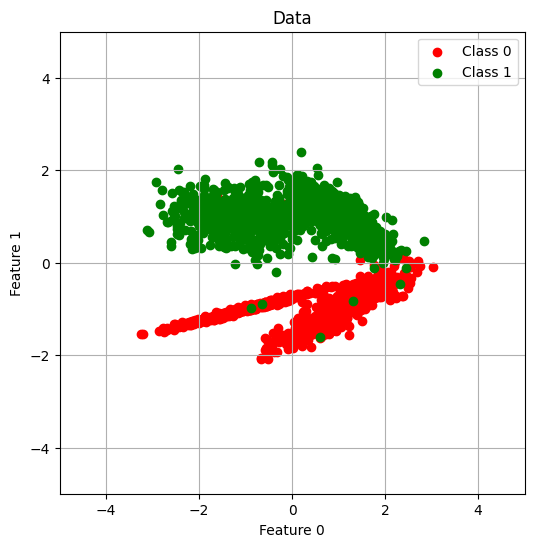

In [31]:
# Plot the data
feature1 = 0
feature2 = 1

plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, feature1], X[y == 0, feature2], c='r', label='Class 0')
plt.scatter(X[y == 1, feature1], X[y == 1, feature2], c='g', label='Class 1')
plt.xlabel(f'Feature {feature1}')
plt.ylabel(f'Feature {feature2}')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.legend()
plt.grid(True)
plt.title('Data')
plt.show()

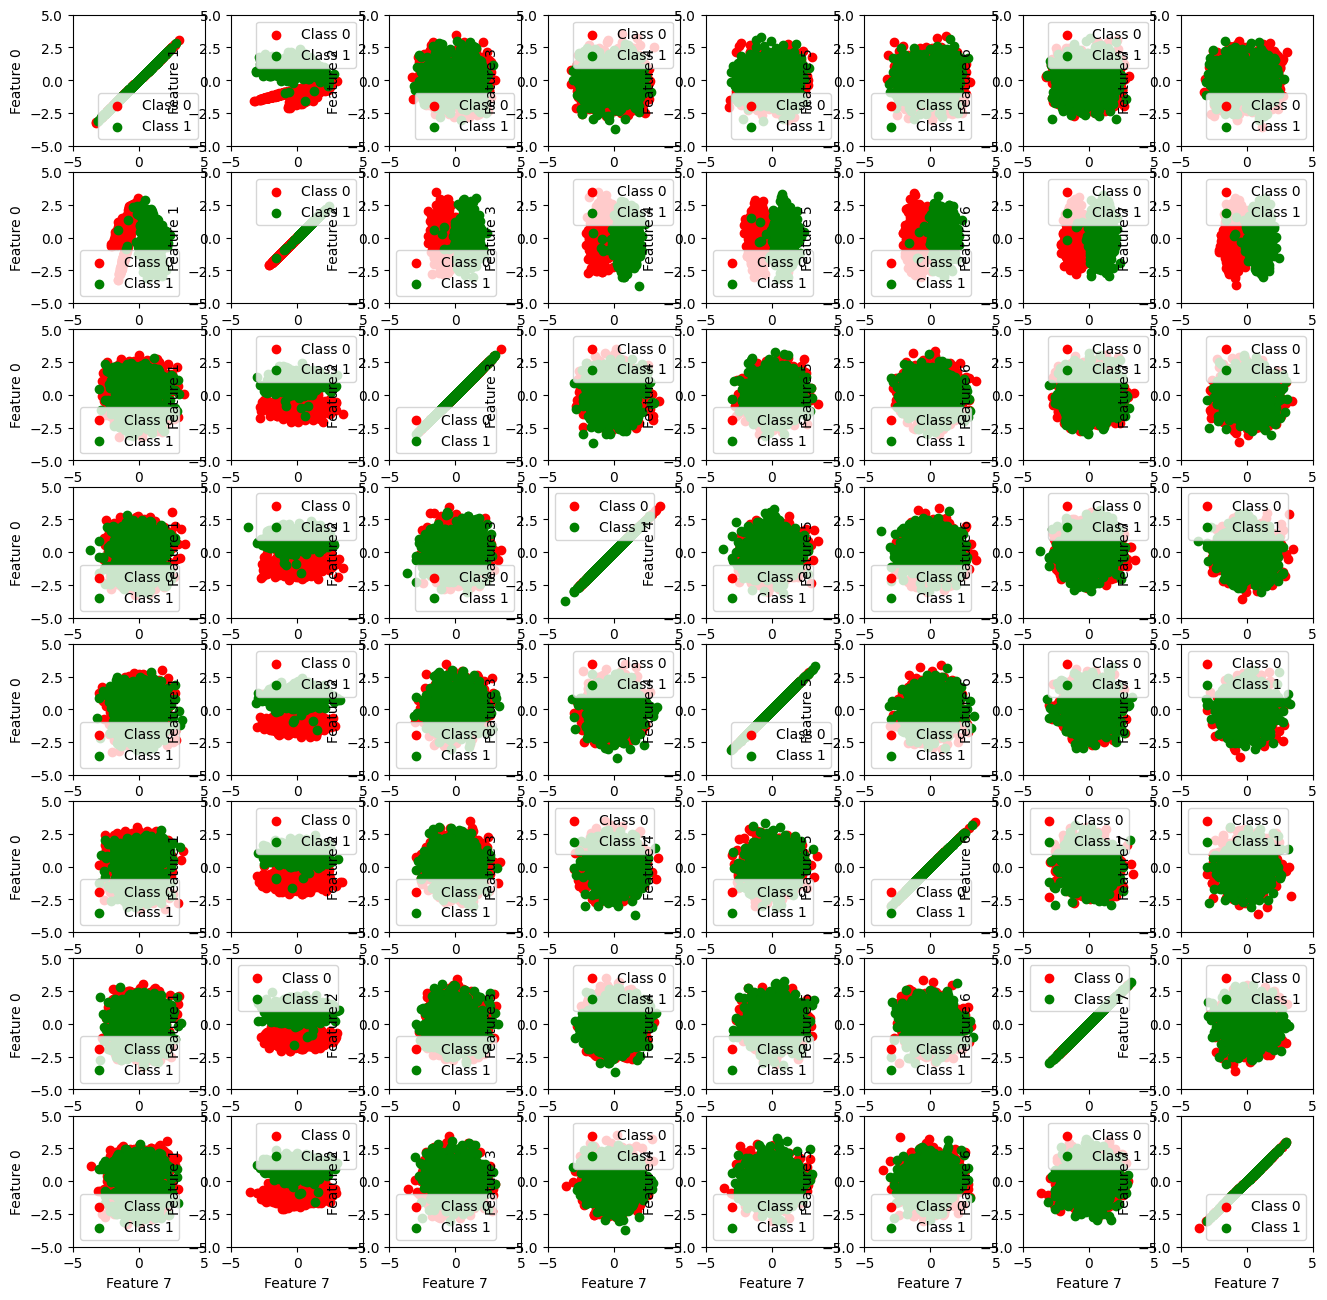

In [32]:
# Make a 10 by 10 subplot plotting each combination of feature vectors

n_features = X.shape[1]
fig, axs = plt.subplots(n_features, n_features, figsize=(16, 16))
for i in range(n_features):
    for j in range(n_features):
        axs[i, j].scatter(X[y == 0, i], X[y == 0, j], c='r', label='Class 0')
        axs[i, j].scatter(X[y == 1, i], X[y == 1, j], c='g', label='Class 1')
        axs[i, j].set_xlabel('Feature {}'.format(i))
        axs[i, j].set_ylabel('Feature {}'.format(j))
        axs[i, j].legend()
        axs[i, j].set_xlim(-5, 5)
        axs[i, j].set_ylim(-5, 5)

plt.show()

## Splitting the Data

In [33]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Fitting and evaluating the RF model

In [34]:
tree_max_depth = 3

In [35]:
# Create a random forest classifier
rf = RandomForest(n_trees=10, max_depth=tree_max_depth, min_size=5)

# Train the random forest
rf.fit(X_train, y_train)

In [36]:
# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


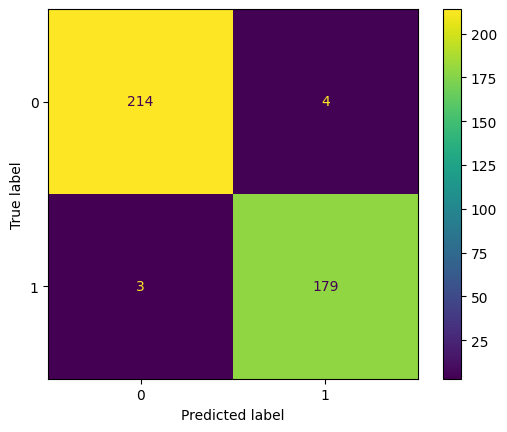

In [37]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [38]:
# Create classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       218
           1       0.98      0.98      0.98       182

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



## Compare to sklearn implementation

In [39]:
clf = RandomForestClassifier(max_depth=tree_max_depth, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=3, random_state=0)

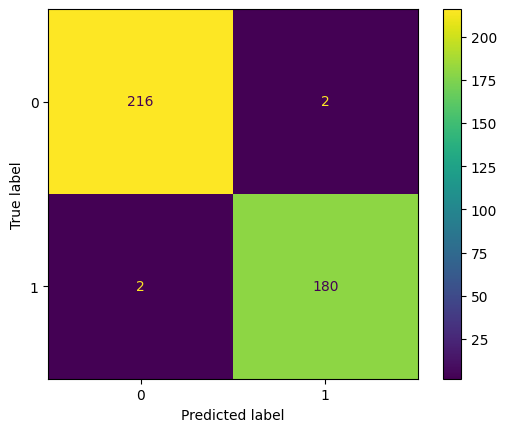

In [40]:
# Generate predictions with the RF model
y_pred_skl = clf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_skl)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [41]:
# Create classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       218
           1       0.98      0.98      0.98       182

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



### Visualize the tree's result

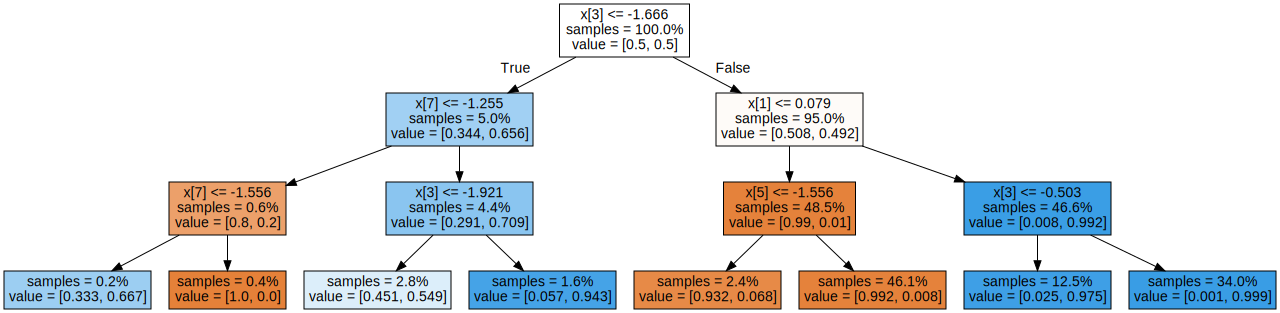

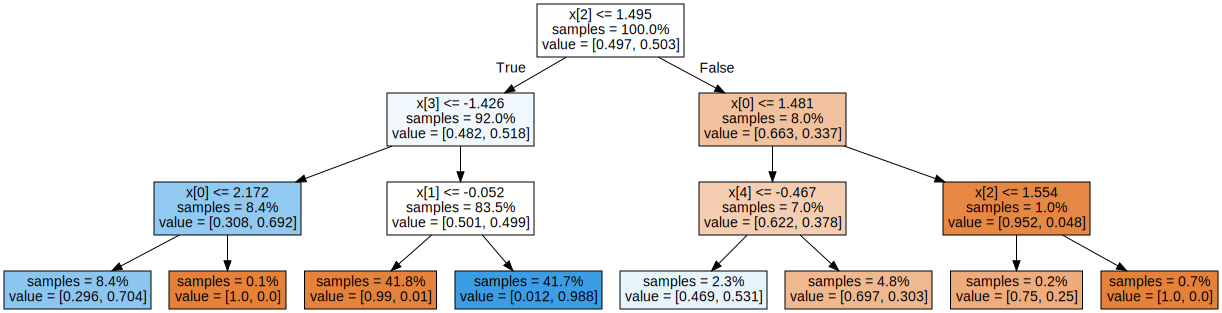

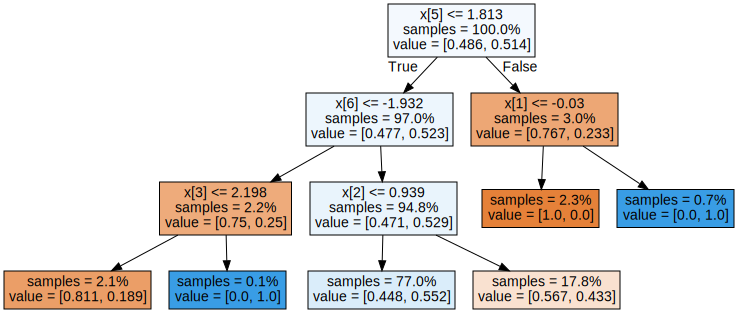

In [42]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = clf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=None,
                               filled=True,
                               max_depth=tree_max_depth,
                               impurity=False,
                               proportion=True)

    graph = graphviz.Source(dot_data)
    display(graph)

Each tree image is limited to only showing the first few nodes. These trees can get very large and difficult to visualize. The colors represent the majority class of each node (box, with red indicating majority 0 (Label 0) and blue indicating majority 1 (Label 1). The colors get darker the closer the node gets to being fully 0 or 1. Each node also contains the following information:

1. The variable name and value used for splitting
2. The % of total samples in each split
3. The % split between classes in each split


### Determine feature importance

In [59]:
# Get number of features from clf
n_features = clf.n_features_in_

# For N number of features, create a List of Strings in the format of ['Feature 1', 'Feature 2', ...]
features_string = [f'Feature {i}' for i in range(0, n_features)]

In [60]:
feature_scores = pd.Series(clf.feature_importances_, index=features_string).sort_values(ascending=False)

print('Feature importance:')
feature_scores

Feature importance:


Feature 1    0.638169
Feature 0    0.077619
Feature 5    0.059158
Feature 2    0.053560
Feature 3    0.048827
Feature 7    0.043123
Feature 6    0.040194
Feature 4    0.039351
dtype: float64

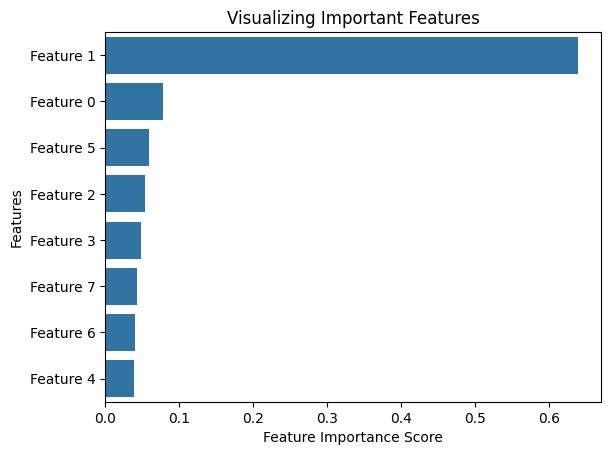

In [61]:
# Creating a seaborn bar plot
sns.barplot(x=np.round(feature_scores,3), y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

## Compare models

In [43]:
def compare_models(y_true, y_pred1, y_pred2, average='macro'):
    """
    Compares the performance of two classifier models using various metrics.

    Args:
        y_true (array-like): True labels.
        y_pred1 (array-like): Predicted labels from model 1.
        y_pred2 (array-like): Predicted labels from model 2.
        average (str, optional): Averaging method for precision, recall, and F1-score.
                                 Options are 'micro', 'macro' (default), or 'weighted'.
    """
    # Accuracy
    acc1 = accuracy_score(y_true, y_pred1)
    acc2 = accuracy_score(y_true, y_pred2)
    print(f"Model 1 Accuracy : {np.round(acc1, 3)}, Model 2 Accuracy : {np.round(acc2, 3)}")

    # Precision
    prec1 = precision_score(y_true, y_pred1, average=average)
    prec2 = precision_score(y_true, y_pred2, average=average)
    print(f"Model 1 Precision: {np.round(prec1, 3)}, Model 2 Precision: {np.round(prec2, 3)}")

    # Recall
    rec1 = recall_score(y_true, y_pred1, average=average)
    rec2 = recall_score(y_true, y_pred2, average=average)
    print(f"Model 1 Recall   : {np.round(rec1, 3)}, Model 2 Recall   : {np.round(rec2, 3)}")

    # F1-score
    f1_1 = f1_score(y_true, y_pred1, average=average)
    f1_2 = f1_score(y_true, y_pred2, average=average)
    print(f"Model 1 F1-score : {np.round(f1_1, 3)}, Model 2 F1-score : {np.round(f1_2, 3)}")

    # Confusion Matrix
    cm1 = confusion_matrix(y_true, y_pred1)
    cm2 = confusion_matrix(y_true, y_pred2)
    print("Model 1 Confusion Matrix:\n", cm1)
    print("Model 2 Confusion Matrix:\n", cm2)

In [44]:
# Example usage
compare_models(y_true=y_test,
               y_pred1=y_pred,
               y_pred2=y_pred_skl,
               average='macro')

Model 1 Accuracy : 0.982, Model 2 Accuracy : 0.99
Model 1 Precision: 0.982, Model 2 Precision: 0.99
Model 1 Recall   : 0.983, Model 2 Recall   : 0.99
Model 1 F1-score : 0.982, Model 2 F1-score : 0.99
Model 1 Confusion Matrix:
 [[214   4]
 [  3 179]]
Model 2 Confusion Matrix:
 [[216   2]
 [  2 180]]


We observe identical agreement between models.

# Conclusion

Throughout this tutorial, we have covered the fundamental concepts and implementation details of random forest classification. By understanding the underlying principles and building the algorithm from scratch, you can gain a deeper appreciation for this powerful ensemble learning technique.

## References

- https://www.datacamp.com/tutorial/random-forests-classifier-python
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles
- https://mlu-explain.github.io/random-forest/
- https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial
- https://en.wikipedia.org/wiki/Random_forest
- https://www.ibm.com/topics/random-forest




# Appendix

## Explain majority voting code

```python
majority_vote = np.array([Counter(pred).most_common(1)[0][0] for pred in predictions])
```


This line performs a majority vote operation on the predictions array, where each element of the resulting `majority_vote` array represents the most common predicted class for the corresponding sample.

Let's break it down:

1. `predictions` is assumed to be a 2D array, where each row represents the predictions for a single sample, and each column represents a different class.

2. `Counter(pred)` creates a `Counter` object from the `collections` module, which counts the occurrences of each element in the `pred` list (which is a row from the `predictions` array).

3. `Counter(pred).most_common(1)` returns a list of tuples, where each tuple contains the element and its count, sorted in descending order by count. By specifying `most_common(1)`, we get a list with only the most common element and its count.

4. `[0][0]` retrieves the most common element itself (the first `[0]` takes the first tuple from the list, and the second `[0]` takes the first element of that tuple, which is the most common element).

5. The list comprehension `[Counter(pred).most_common(1)[0][0] for pred in predictions]` applies this process to each row (`pred`) in the `predictions` array, resulting in a list of the most common predicted classes for each sample.

6. `np.array(...)` converts this list into a NumPy array, which is assigned to `majority_vote`.

So, after executing this line, `majority_vote` will be a 1D NumPy array, where each element represents the most common predicted class for the corresponding sample in the `predictions` array.

For example, if `predictions` is:

```python
predictions = [[0, 1, 0, 2],
               [1, 1, 1, 0],
               [2, 0, 2, 2]]
```

Then, `majority_vote` will be:

```python
majority_vote = [0, 1, 2]
```

This operation is often used in ensemble learning methods, where multiple models make predictions, and the final prediction is determined by taking the majority vote (most common prediction) across all models.